# Erstes Notenbonus-Quiz

In [15]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

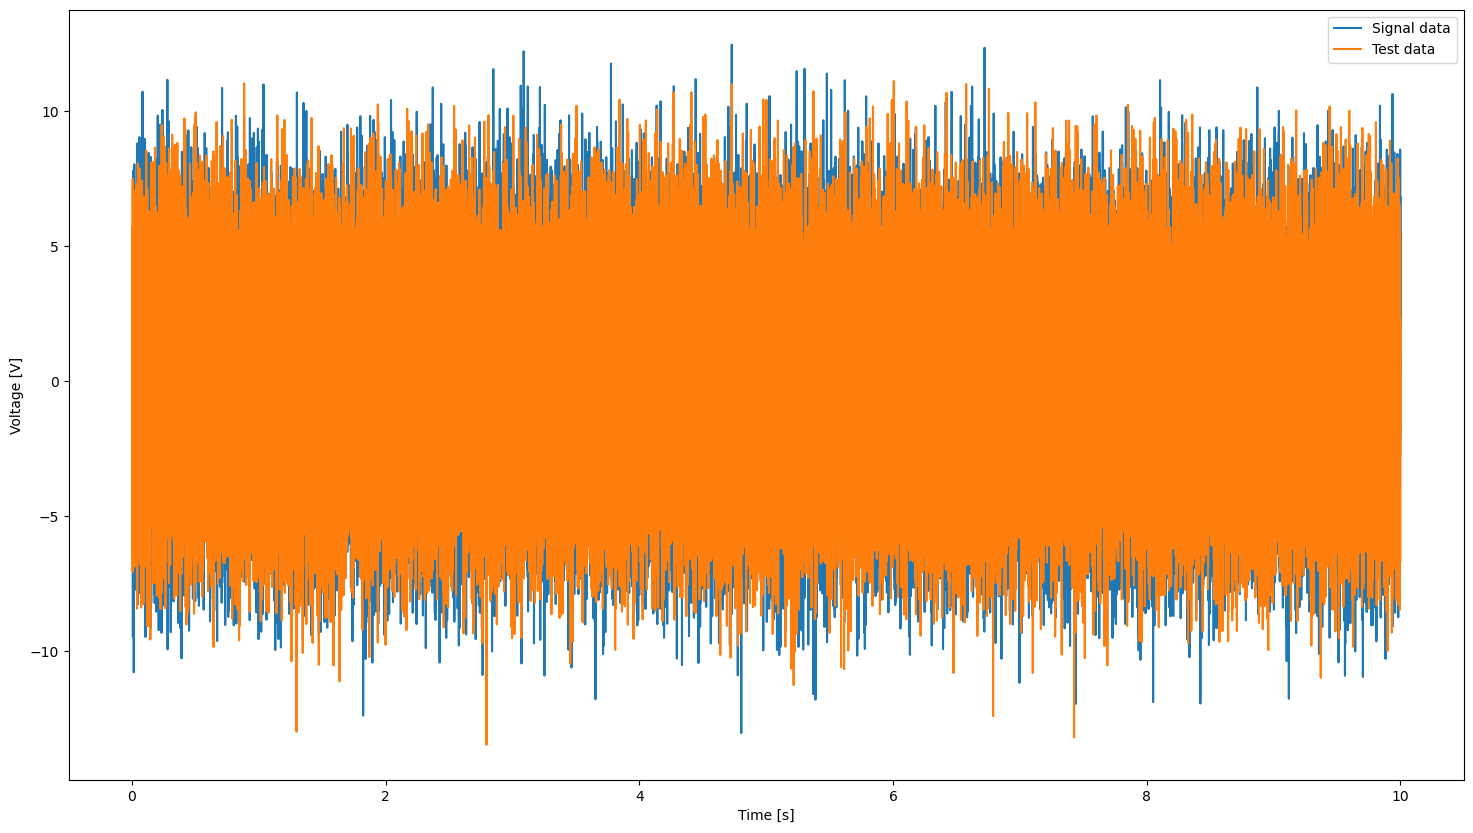

In [16]:
data = np.loadtxt('data.txt', comments='#', delimiter=' ')
t = data[:, 0]
signal = data[:, 1]
test = data[:, 2]

_, ax = plt.subplots(figsize=(18,10))
ax.set_xlabel('Time [s]')
ax.set_ylabel('Voltage [V]')
ax.plot(t, signal, label='Signal data')
ax.plot(t, test, label='Test data')
ax.legend()

## Standardabweichung $\sigma_\text{Test}$ und zugehörige durchschnittliche zweiseitig definierte spektrale Leistungsdichte $S_\text{Test}$?

In [17]:
print(f'Standard deviation of test data: {np.std(test)} V')

f_t, psd_t = sp.signal.periodogram(test, len(t)/t[-1], return_onesided=False, scaling='density')
print(f'Mean of twosided power spectral density: {np.mean(psd_t)} V^2/Hz')

Standard deviation of test data: 2.897750968809413 V
Mean of twosided power spectral density: 0.000839696067723589 V^2/Hz


## Drei grösste Oszillationen im Frequenzspektrum bzw. höchste Werte des spektralen Leistungsdichte?

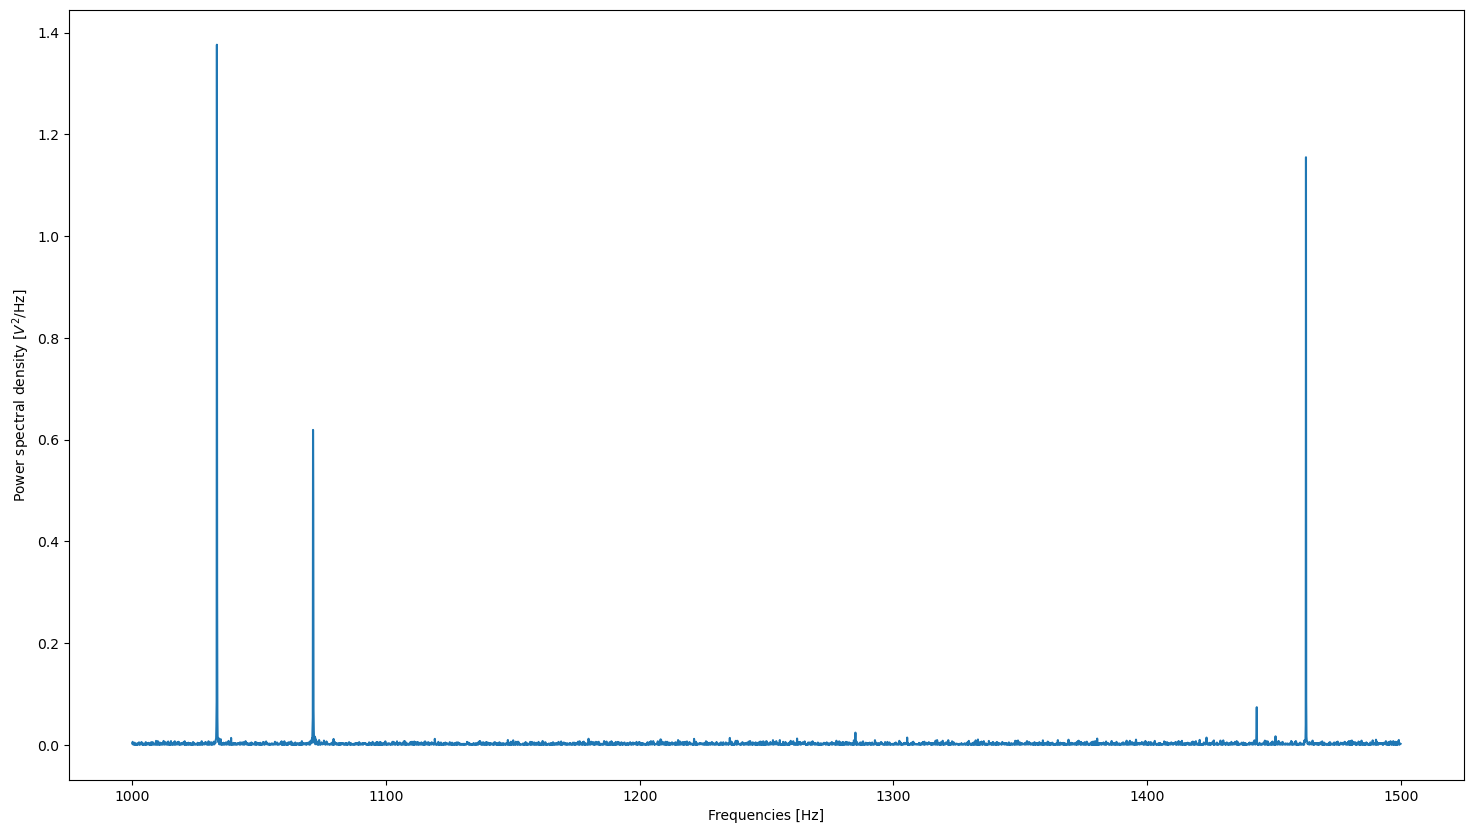

In [18]:
f_s, psd_s = sp.signal.periodogram(signal, len(t)/t[-1], return_onesided=True, scaling='density')

_, ax = plt.subplots(figsize=(18,10))
ax.set_xlabel('Frequencies [Hz]')
ax.set_ylabel('Power spectral density [$V^2$/Hz]')
ax.plot(f_s[10000:15000], psd_s[10000:15000])

In [19]:
print(f'Highest oscillation, frequency: {f_s[np.argmax(psd_s)]} Hz')
print(f'Second highest oscillation, frequency: {f_s[np.argsort(psd_s)[-2]]} Hz')
print(f'Third highest oscillation, frequency: {f_s[np.argsort(psd_s)[-3]]} Hz')

Highest oscillation, frequency: 1033.3 Hz
Second highest oscillation, frequency: 1462.6000000000001 Hz
Third highest oscillation, frequency: 1071.2 Hz


## Varianz der Messung $\sigma^2_\text{Messung}$ und Varianz des Baustellenlärms für unkorrelierte Werte $\sigma^2_\text{Baustelle}$?

In [20]:
print(f'Variance of measurements: {np.var(signal)} V^2')
print(f'Variance of construction site noise alone: {np.var(signal) - np.var(test)} V^2')

Variance of measurements: 9.212587262392118 V^2
Variance of construction site noise alone: 0.8156265851562274 V^2
